In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Marketing.csv')

In [3]:
vis_mean = data.groupby('Day_Name').Visitors.mean().sort_values(ascending = False)
vis_mean  # It's actually like a dictionary !

Day_Name
Thursday     2252.769231
Friday       1968.423077
Wednesday    1614.884615
Sunday       1493.538462
Monday       1491.461538
Tuesday      1436.000000
Saturday     1410.038462
Name: Visitors, dtype: float64

In [4]:
vis_mean['Friday']

1968.423076923077

In [5]:
vis_mean.index

Index(['Thursday', 'Friday', 'Wednesday', 'Sunday', 'Monday', 'Tuesday',
       'Saturday'],
      dtype='object', name='Day_Name')

In [6]:
vis_mean.values

array([2252.76923077, 1968.42307692, 1614.88461538, 1493.53846154,
       1491.46153846, 1436.        , 1410.03846154])

In [7]:
rev_mean = data.groupby('Day_Name').Revenue.mean()
rev_mean

Day_Name
Friday       13550.576923
Monday        8774.038462
Saturday      9549.692308
Sunday        9751.807692
Thursday     13663.384615
Tuesday       8659.807692
Wednesday    10121.846154
Name: Revenue, dtype: float64

In [8]:
rev_mean[vis_mean.index]  ## in order to sort this data with the same order of days in vis_mean

Day_Name
Thursday     13663.384615
Friday       13550.576923
Wednesday    10121.846154
Sunday        9751.807692
Monday        8774.038462
Tuesday       8659.807692
Saturday      9549.692308
Name: Revenue, dtype: float64

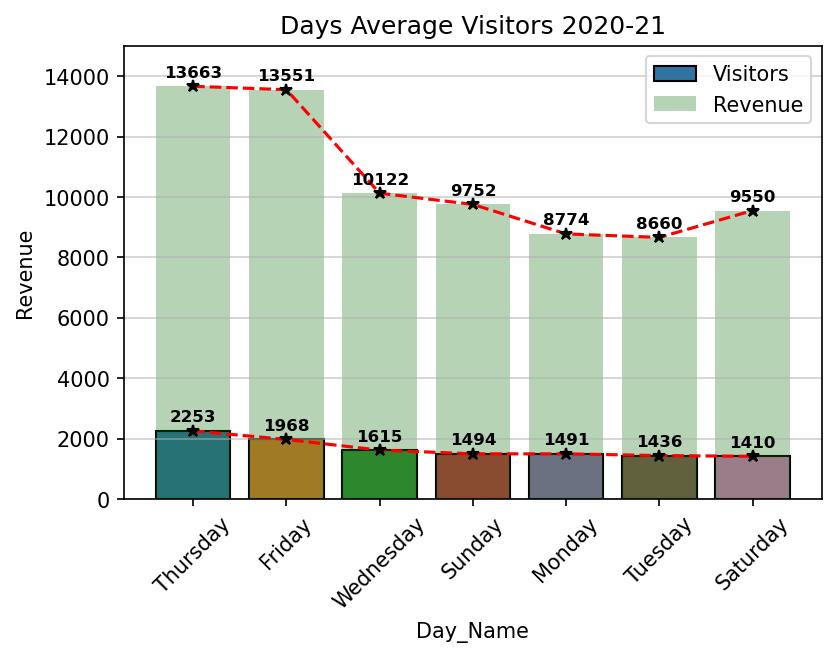

In [9]:
# plot average number of visitors grouped by day in all the year .
vis_mean = data.groupby('Day_Name').Visitors.mean().sort_values(ascending = False)
rev_mean = data.groupby('Day_Name').Revenue.mean()
plt.figure(dpi = 150)
sns.barplot(x = vis_mean.index , y = vis_mean.values , edgecolor = 'k' , label = 'Visitors')
sns.barplot(x = vis_mean.index , y = rev_mean[vis_mean.index] , color = 'g', alpha = 0.3 , label = 'Revenue' )
## rev_mean[vis_mean.index] to make the order of data picking by day the same as the order of the index (days) in vis_mean
plt.plot(vis_mean.index , vis_mean.values , 'r*--', mfc = 'k' , mec = 'k')
plt.plot(vis_mean.index , rev_mean[vis_mean.index] ,'r*--' , mfc = 'k' , mec = 'k')

plt.xticks(rotation = 45)
plt.ylim(0,15000)

# Write Text Numbers on Bars :
for day in vis_mean.index:
    plt.text(day , vis_mean[day]+300 , str(int(round(vis_mean[day]))) , color = 'k' ,horizontalalignment='center' , 
             fontsize = 8 , fontweight = 'bold')
    plt.text(day , rev_mean[day]+300 , str(int(round(rev_mean[day]))) , color = 'k' ,horizontalalignment='center' , 
             fontsize = 8 , fontweight = 'bold')


plt.title('Days Average Visitors 2020-21')
plt.legend()
plt.grid(axis = 'y' , alpha = 0.6)
